<a href="https://colab.research.google.com/github/Tatianacp1/MineriaDatos/blob/main/Parcial1MineriaDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Parcial 1 Minería de datos
## Tatiana Chavez Perez


In [8]:
import pandas as pd
import numpy as np
import csv

In [12]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas


In [40]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/prof-tatiana-gutierrez/DatosMD/master/student-mat.csv',
    sep = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [83]:
df.shape

### Punto 1

In [11]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Se evidencia que no hay valores vacíos para ninguna variable.

### Punto 2:

In [14]:
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

Hay 307 estudiantes que viven en la zona urbana y 88 que viven en la zona rural.

In [15]:
df[['address','sex']].value_counts()

address  sex
U        F      164
         M      143
R        F       44
         M       44
dtype: int64

Donde de los 88 estudiantes que viven en la zona rural, 44 de esos estudiantes son mujeres.

### Punto 3.

In [55]:
from dfply import *

B2 = (df >>
 mask(X.address == 'R', X.absences<5))
print(B2[['absences']].value_counts().sum())
print(B2.shape)

49
(49, 33)


Hay 49 estudiantes que tienen menos de 5 fallas que viven en la zona rural

In [57]:
B3 = (df >>
 mask(X.address == 'R', X.sex == 'F', X.absences<5))
B3[['absences']].value_counts().sum()

24

De los 49 estudiantes que tienen menos de 5 fallas que viven en la zona rural, 24 de esos estudiantes son mujeres.

### Punto 4

In [59]:
B4 = (df >>
 select(X.school ,X.internet,X.G1))


In [61]:
pd.pivot_table(B4, index=['school','internet'], aggfunc=np.mean)

G1
school internet           
GP     no        10.538462
       yes       11.010101
MS     no         9.785714
       yes       11.062500

In [65]:
10.538462-9.785714

0.7527480000000004

Se encuentra que para el colegio Gabriel Pereira la media se presento más alta para los estudiantes que si tenían internet con una media de 11.01, de igual forma se presenta el mismo escenario para el colegio Mousinho da Silveira siendo una media más alta que en el colegio Gabriel Pereira siendo la media de 11.06, por otro lado los estudiantes que no tienen internet en su casas, la media fue menor para el colegio Mousinho da Silveira con una diferencia de 0.7527.

### Punto 5.

In [77]:
B5 = (df >>
 mutate(
   cal_total = (X.G1*0.35)+(X.G2*0.35)+(X.G3*0.30)
 ))

In [78]:
B5.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,cal_total
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.65
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.30
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.25
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.65
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.60


In [80]:
B5['cal_total'].describe()

count    395.000000
mean      10.692532
std        3.662308
min        1.400000
25%        8.350000
50%       10.700000
75%       13.325000
max       19.300000
Name: cal_total, dtype: float64

Teniendo en cuenta la nueva calificación total la media es de 10.69 puntos, la mediana de 10.70, la mínima calificación fue de 1.4 puntos y la máxima de 19.30 puntos.

### Punto 6.

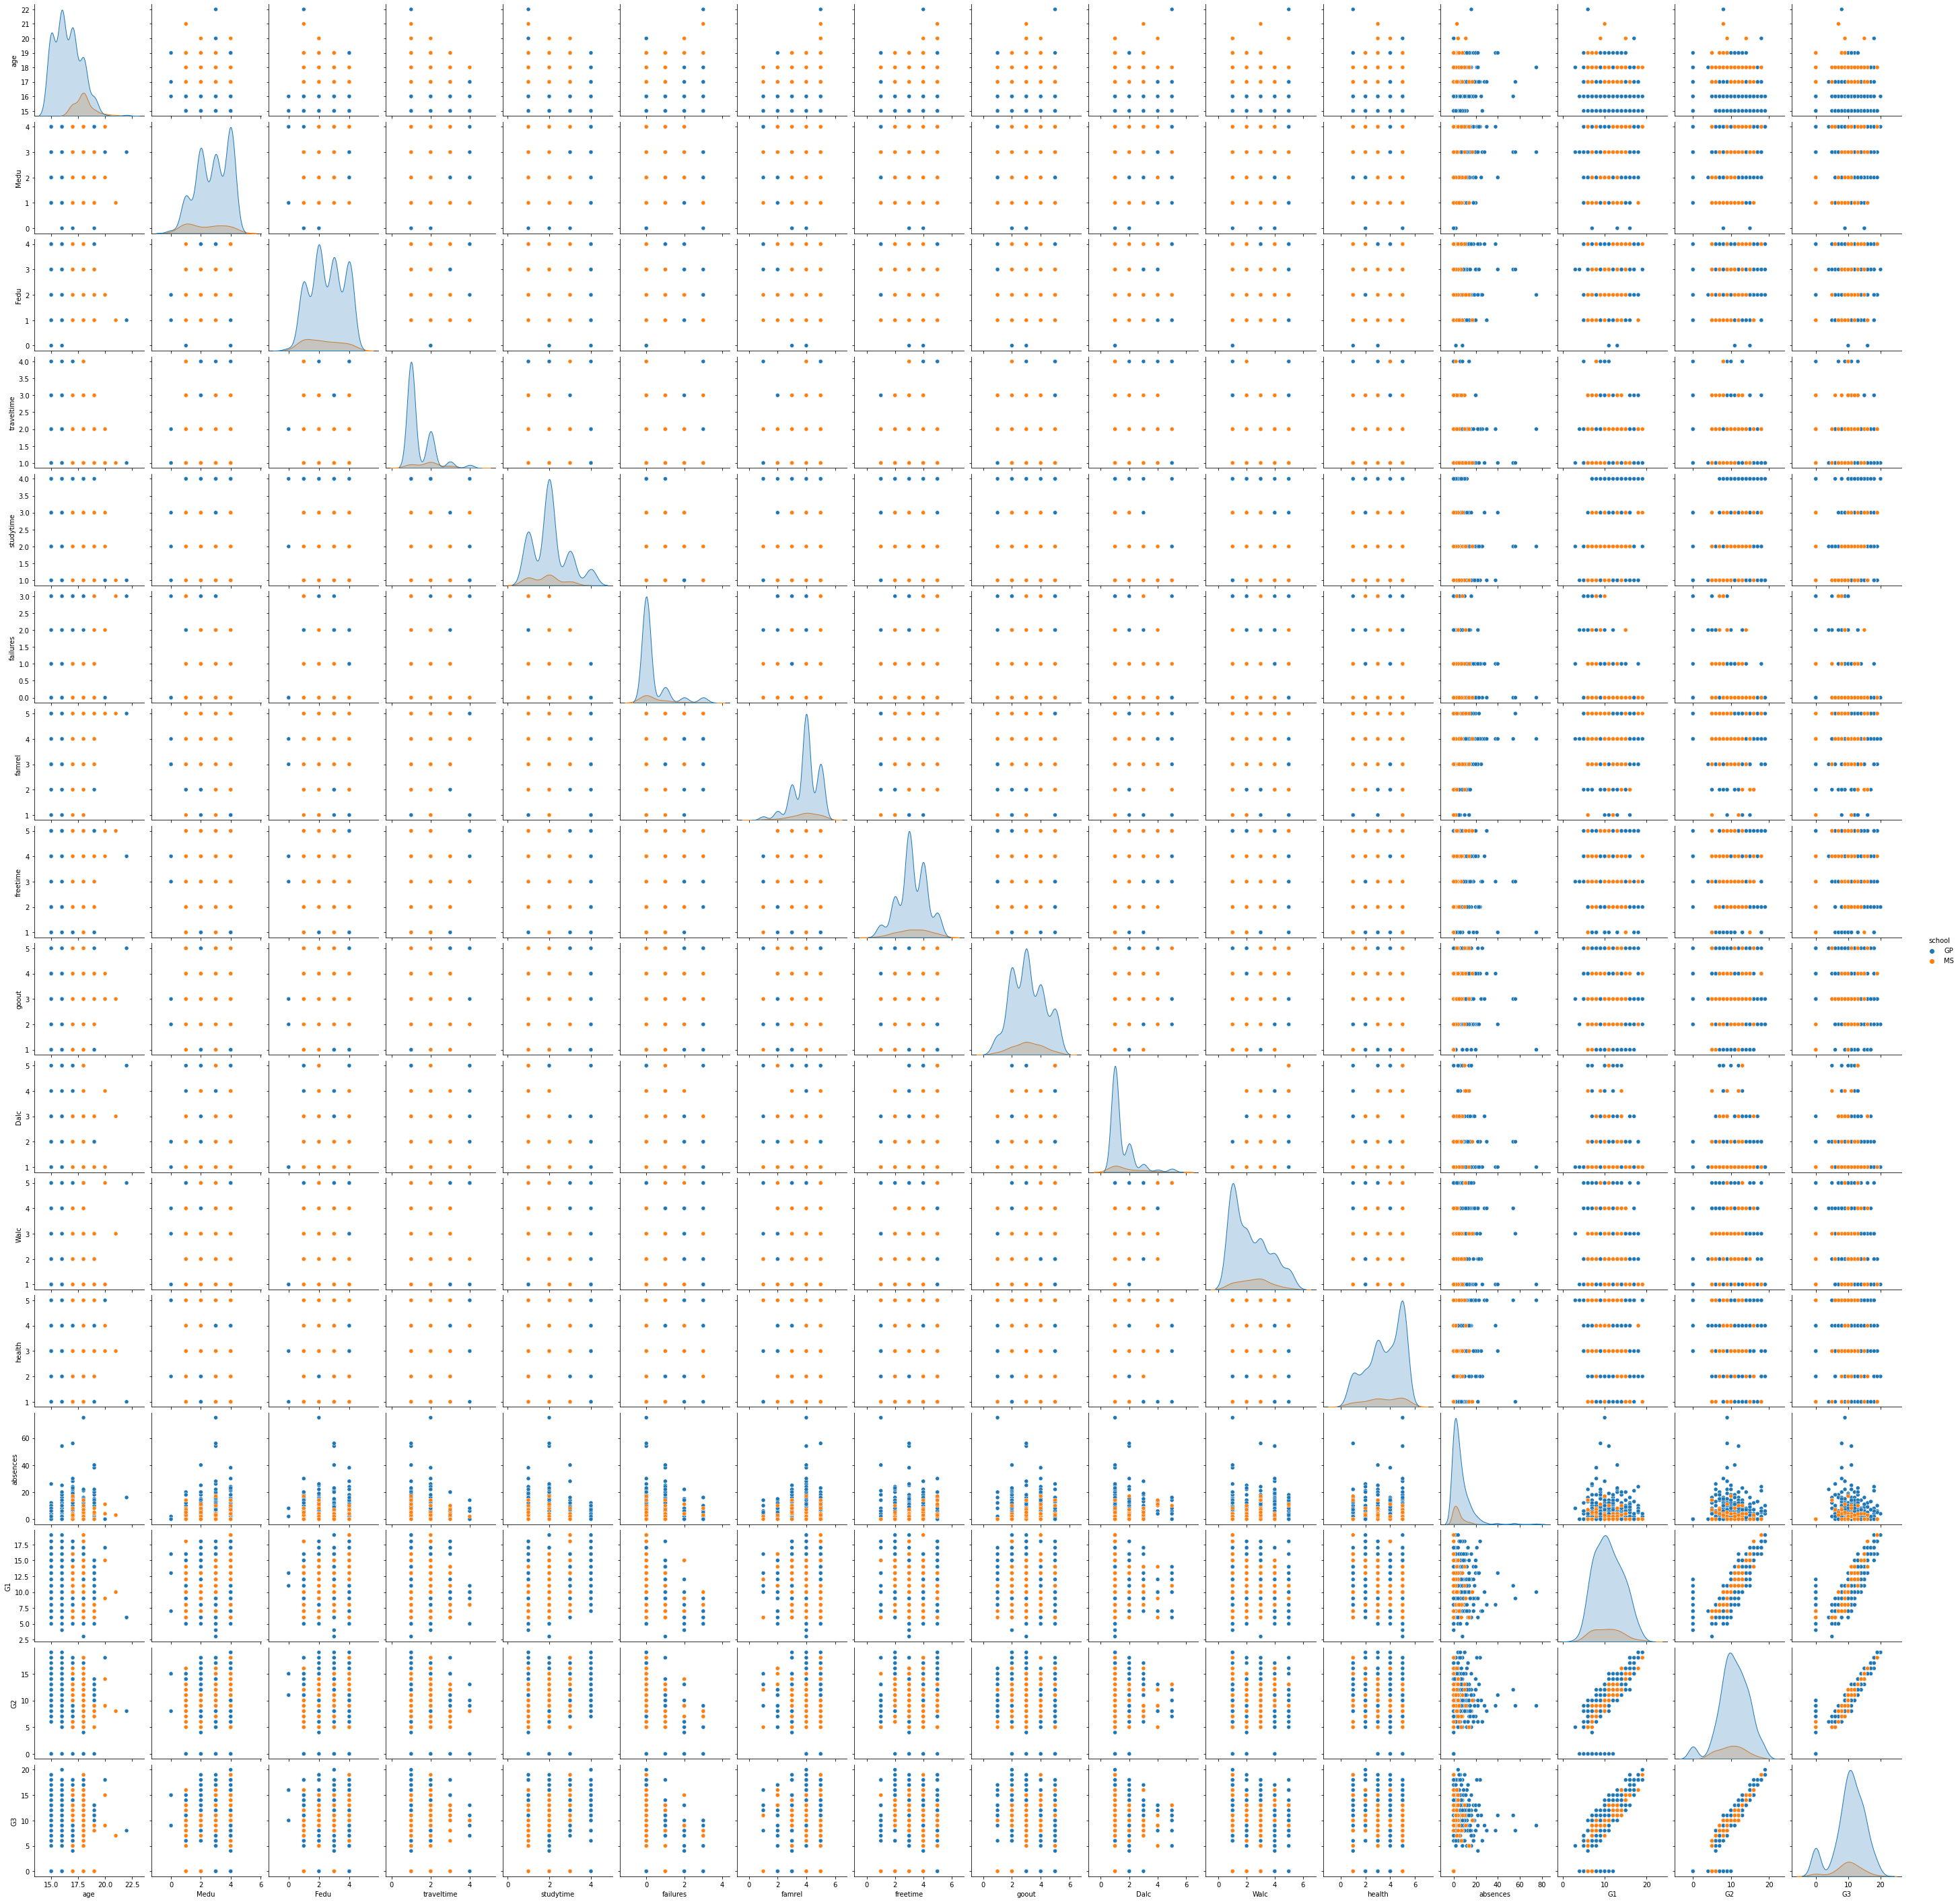

In [82]:
import seaborn as sns
sns.pairplot(df, hue='school')

De acuerdo a la gran cantidad de variables categóricas que presenta la base de datos, se podría pensar en un análisis de clasificación sin embargo no hay se observa claramente una variable de interés para predecir por este análisis. Por lo cuál se piensa que una variable de interés puede ser la variable de calificación final (G3) es decir un tipo de análisis de regresión, donde una hipótesis para la pre-selección de variables serían: La edad, el sexo, el tipo de domicilio, tamaño de la familia, tiempo de viaje de casa a la escuela, tiempo de estudio, si tiene o no apoyo educativo extra, número de reprobaciones de clases pasadas, si o no tiene acceso a internet en casa, número de ausencias escolares, la calificación del primer y segundo período, se observa mediante gráficos los posibles escenarios que podrían tener las variables escogidas en la variable de interés.

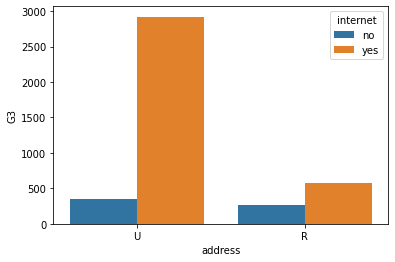

In [89]:
sns.barplot(data = df,
            estimator = sum,
            x = "address", 
            y = "G3",
            hue = "internet",
            ci = None)

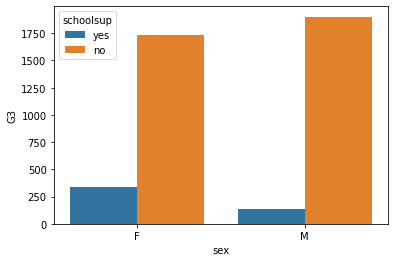

In [90]:
sns.barplot(data = df,
            estimator = sum,
            x = "sex", 
            y = "G3",
            hue = "schoolsup",
            ci = None)